In [3]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data
We sourced this data from [Kaggle](https://www.kaggle.com/datasets/puneet6060/intel-image-classification) on a competition to classify landscapes. This data contains 6 different classes of types of landscapes and approximately 14k different images (approximately 2.5k in each class). 

In [4]:
import zipfile
with zipfile.ZipFile("archive.zip","r") as zip_ref:
    zip_ref.extractall("archive")


KeyboardInterrupt



In [5]:
# Look into the data directory
data_dir = 'archive/'#'../input/intel-image-classification/'
print(os.listdir(data_dir))

['seg_test', 'seg_train', 'seg_pred']


In [37]:
# Get the classes
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [38]:
buildings_files = os.listdir(data_dir + "/seg_train/seg_train/buildings")
print('No. of training examples for buildings:', len(buildings_files))

forest_files = os.listdir(data_dir + "/seg_train/seg_train/forest")
print('No. of training examples for forests:', len(forest_files))

glacier_files = os.listdir(data_dir + "/seg_train/seg_train/glacier")
print('No. of training examples for glaciers:', len(glacier_files))

mountain_files = os.listdir(data_dir + "/seg_train/seg_train/mountain")
print('No. of training examples for mountains:', len(mountain_files))

sea_files = os.listdir(data_dir + "/seg_train/seg_train/sea")
print('No. of training examples for seas:', len(sea_files))

street_files = os.listdir(data_dir + "/seg_train/seg_train/street")
print('No. of training examples for streets:', len(street_files))

No. of training examples for buildings: 2191
No. of training examples for forests: 2271
No. of training examples for glaciers: 2404
No. of training examples for mountains: 2512
No. of training examples for seas: 2274
No. of training examples for streets: 2382


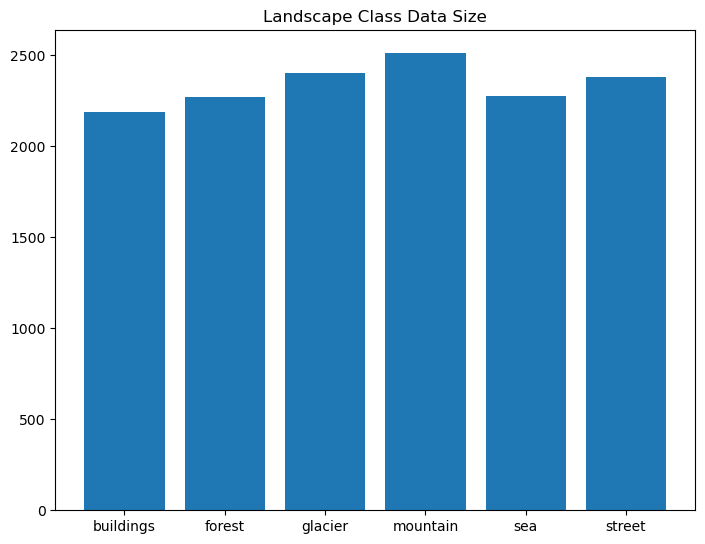

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
landscapes = [len(buildings_files),len(forest_files),len(glacier_files),len(mountain_files),len(sea_files),len(street_files)]
ax.bar(classes,landscapes)
plt.title("Landscape Class Data Size")
plt.show()

In [77]:
# Define a list to hold the data for each image
import re
import pandas as pd
from PIL import Image
data = []

# Sanity check
matches_count = 0

train_dir = 'archive/seg_train/seg_train/'

for k in classes: 
    k_dir = train_dir + k + "/"
    # Loop over each file in the directory
    for filename in tqdm(os.listdir(k_dir)):
        #print(filename)
        filepath = os.path.join(train_dir, k, filename)
        #image = Image.open(filepath)
        try: 
            image = Image.open(filepath)
            #print("Worked")
        except: 
            print("Missing image: " + filepath)
            continue
        try: 
            assert(np.array(image).shape == (150, 150, 3))
        except: 
            print(np.array(image).shape)
            continue
        data.append({'filename': filename, 'image': np.array(image), 'class': k})
        image.close()
# Create a dataframe from the data
df = pd.DataFrame(data)

 78%|████████████████████████████▉        | 1714/2191 [00:01<00:00, 1572.09it/s]

(124, 150, 3)


 12%|████▋                                 | 278/2271 [00:00<00:01, 1388.94it/s]

(115, 150, 3)


 25%|█████████▎                            | 557/2271 [00:00<00:01, 1378.52it/s]

(108, 150, 3)
(136, 150, 3)
(108, 150, 3)
(135, 150, 3)


 74%|███████████████████████████▎         | 1674/2271 [00:01<00:00, 1377.01it/s]

(133, 150, 3)
(113, 150, 3)


 86%|███████████████████████████████▊     | 1952/2271 [00:01<00:00, 1379.90it/s]

(113, 150, 3)


 14%|█████▏                                | 330/2404 [00:00<00:01, 1651.92it/s]

(111, 150, 3)
(134, 150, 3)


 28%|██████████▍                           | 662/2404 [00:00<00:01, 1649.62it/s]

(142, 150, 3)
(149, 150, 3)


 41%|███████████████▋                      | 992/2404 [00:00<00:00, 1642.69it/s]

(76, 150, 3)
(111, 150, 3)
(123, 150, 3)


 55%|████████████████████▎                | 1323/2404 [00:00<00:00, 1600.06it/s]

(105, 150, 3)
(102, 150, 3)


 75%|███████████████████████████▊         | 1811/2404 [00:01<00:00, 1600.60it/s]

(143, 150, 3)
(146, 150, 3)
(111, 150, 3)
(120, 150, 3)


 89%|████████████████████████████████▉    | 2139/2404 [00:01<00:00, 1616.23it/s]

(110, 150, 3)
(97, 150, 3)


100%|█████████████████████████████████████| 2404/2404 [00:01<00:00, 1611.80it/s]


(135, 150, 3)
(119, 150, 3)


 20%|███████▌                              | 500/2512 [00:00<00:01, 1653.06it/s]

(147, 150, 3)
(103, 150, 3)
(131, 150, 3)
(135, 150, 3)


 33%|████████████▋                         | 836/2512 [00:00<00:01, 1667.12it/s]

(144, 150, 3)
(100, 150, 3)


 60%|██████████████████████▏              | 1510/2512 [00:00<00:00, 1478.69it/s]

(123, 150, 3)
(136, 150, 3)
(113, 150, 3)
(81, 150, 3)


 73%|██████████████████████████▊          | 1822/2512 [00:01<00:00, 1492.81it/s]

(143, 150, 3)
(134, 150, 3)
(146, 150, 3)
(141, 150, 3)


 92%|██████████████████████████████████▏  | 2319/2512 [00:01<00:00, 1590.11it/s]

(142, 150, 3)
(144, 150, 3)


100%|█████████████████████████████████████| 2512/2512 [00:01<00:00, 1593.58it/s]


(145, 150, 3)


 43%|████████████████▎                     | 978/2274 [00:00<00:00, 1659.12it/s]

(113, 150, 3)


 88%|████████████████████████████████▍    | 1992/2274 [00:01<00:00, 1669.07it/s]

(113, 150, 3)
(113, 150, 3)
(140, 150, 3)


100%|█████████████████████████████████████| 2382/2382 [00:01<00:00, 1520.21it/s]

(113, 150, 3)


In [78]:
one_hot_encoded = pd.get_dummies(df['class'])

# Concatenate the original DataFrame with the one-hot encoded columns
df = pd.concat([df, one_hot_encoded], axis=1)

In [79]:
df.head()

,filename,image,class,buildings,forest,glacier,mountain,sea,street
0,12536.jpg,"[[[10, 6, 0], [86, 76, 51], [80, 61, 31], [85,...",buildings,1,0,0,0,0,0
1,16750.jpg,"[[[80, 115, 171], [81, 116, 172], [81, 116, 17...",buildings,1,0,0,0,0,0
2,16988.jpg,"[[[164, 184, 175], [158, 174, 164], [159, 174,...",buildings,1,0,0,0,0,0
3,4571.jpg,"[[[186, 193, 203], [186, 193, 203], [185, 192,...",buildings,1,0,0,0,0,0
4,12244.jpg,"[[[118, 126, 89], [99, 106, 75], [125, 127, 10...",buildings,1,0,0,0,0,0


In [82]:
# Load the data and split into training and testing sets
from sklearn.model_selection import train_test_split

x = df['image'].to_numpy()
x = np.stack(x, axis=0)
y = df[classes].to_numpy().astype('int32')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=109)

# Convert the data type of the image arrays to float32 and normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Creating and Training the Model

We used transfer learning to train the model using TensorFlows VGG19. We added an additional sequential layer on top of the VGG19 to classify the different images using softmax activation. We used categorical crossentropy for our loss. 
A learning rate of 0.0005 seemed reasonable because it is slightly lower than the default. 

In [87]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers so they're not trainable
for layer in base_model.layers:
    layer.trainable = False
    
model2_classifier = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model2 = tf.keras.Model(inputs=base_model.input, outputs=model2_classifier(base_model.output))

# Loss function and optimizer
criterion = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
land_history = model2.fit(x_train, y_train, epochs=10, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/10
1399/1399 [==============================] - 706s 504ms/step - loss: 0.4833 - accuracy: 0.8251 - val_loss: 0.3765 - val_accuracy: 0.8656
Epoch 2/10
1399/1399 [==============================] - 741s 530ms/step - loss: 0.3283 - accuracy: 0.8817 - val_loss: 0.3872 - val_accuracy: 0.8667
Epoch 3/10
1399/1399 [==============================] - 733s 524ms/step - loss: 0.2596 - accuracy: 0.9057 - val_loss: 0.3731 - val_accuracy: 0.8717
Epoch 4/10
1399/1399 [==============================] - 627s 448ms/step - loss: 0.2236 - accuracy: 0.9208 - val_loss: 0.4181 - val_accuracy: 0.8620
Epoch 5/10
1399/1399 [==============================] - 632s 452ms/step - loss: 0.1912 - accuracy: 0.9320 - val_loss: 0.4022 - val_accuracy: 0.8674
Epoch 6/10
1399/1399 [==============================] - 593s 424ms/step - loss: 0.1661 - accuracy: 0.9432 - val_loss: 0.4327 - val_accuracy: 0.8610
Epoch 7/10
1399/1399 [==============================] - 597s 427ms/step - loss: 0.1505 - accuracy: 0.9481 - val_

In [89]:
model2.save('my_model.h5')

## Evaluating the Model
After only 10 epochs (when the loss started to plateau), this model was able to achieve an accuracy of about 96% on the training data and approximately 86% on the testing data. If we are able to use transfer learning on these trained weights, we could use this model to extract features that could help us classify images as Democrat or Republican. 

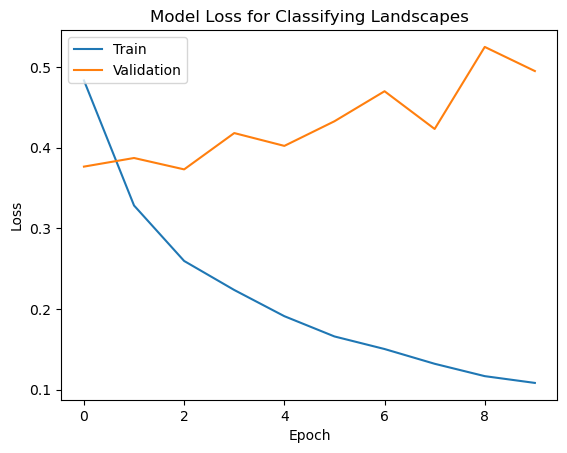

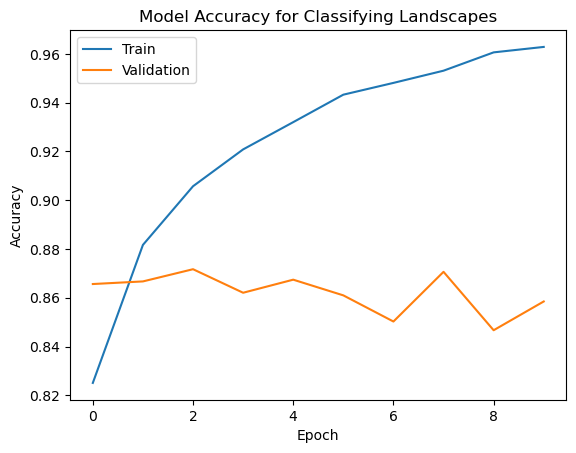

In [91]:
plt.plot(land_history.history['loss'])
plt.plot(land_history.history['val_loss'])
plt.title('Model Loss for Classifying Landscapes')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(land_history.history['accuracy'])
plt.plot(land_history.history['val_accuracy'])
plt.title('Model Accuracy for Classifying Landscapes')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()